<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

WHO = 7
SONG = 1
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

15:16:29 INFO << load arm CSV.
15:16:29 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, 7, 1, pf_order, train_pf.left_modes, train_pf.right_modes)) 
            
    return pfs

In [5]:
pfs = gogo(WHO, SONG, TRAIN_ORDER)

100%|██████████| 3/3 [00:36<00:00, 12.13s/it]


In [6]:
# pf.plot_global_event()

In [7]:
for i in range(len(pfs)):
    print(pfs[i].primitive_df)

     hand_side        AI            VI       SMA       AAE           ARE
0         left  0.380697  1.765262e-05  0.572000  0.144948    638.752143
1        right  0.314897  8.699768e-05  0.538667  0.099247  11676.785575
2         left  0.399326  1.394122e-05  0.609000  0.159475    443.594519
3        right  0.344263  4.328605e-06  0.552500  0.118521   9097.855099
4         left  0.398885  7.015269e-06  0.595000  0.159116    346.963127
5        right  0.370042  0.000000e+00  0.561000  0.136931   5605.603345
6         left  0.383932  2.187062e-05  0.543000  0.147426    354.660047
7        right  0.367128  1.172303e-06  0.566000  0.134784   3238.239405
8         left  0.367103  9.956313e-05  0.503000  0.134864    408.724552
9        right  0.393184  2.497655e-05  0.636000  0.154619   1495.110595
10        left  0.353712  0.000000e+00  0.512000  0.125112    256.513430
11       right  0.363296  6.067740e-04  0.518000  0.132591    344.802852
12        left  0.344646  0.000000e+00  0.507000  0

In [8]:
model = Model(k_centroid=50)
model.fit(pfs[TRAIN_ORDER - 1])

100%|██████████| 361/361 [00:51<00:00,  6.97it/s]


In [9]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 5, 6], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

predicting 1 performance


100%|██████████| 361/361 [00:52<00:00,  6.92it/s]


============  left arm ============
Normalized confusion matrix
[[ 0.325       0.04583333  0.          0.60833333  0.02083333  0.        ]
 [ 0.20779221  0.07792208  0.          0.71428571  0.          0.        ]
 [ 0.16666667  0.          0.          0.83333333  0.          0.        ]
 [ 0.375       0.          0.          0.625       0.          0.        ]
 [ 0.16        0.          0.          0.          0.84        0.        ]
 [ 0.6         0.          0.          0.          0.4         0.        ]]


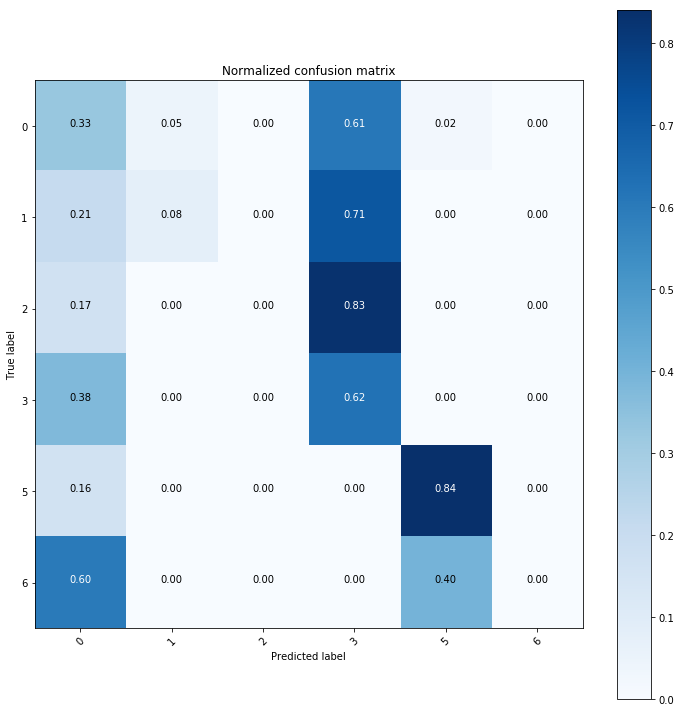

============ right arm ============
Normalized confusion matrix
[[ 0.90416667  0.03333333  0.04583333  0.0125      0.00416667  0.        ]
 [ 0.93506494  0.          0.06493506  0.          0.          0.        ]
 [ 0.83333333  0.          0.16666667  0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.          0.        ]
 [ 0.32        0.          0.          0.          0.52        0.16      ]
 [ 0.2         0.          0.          0.          0.          0.8       ]]


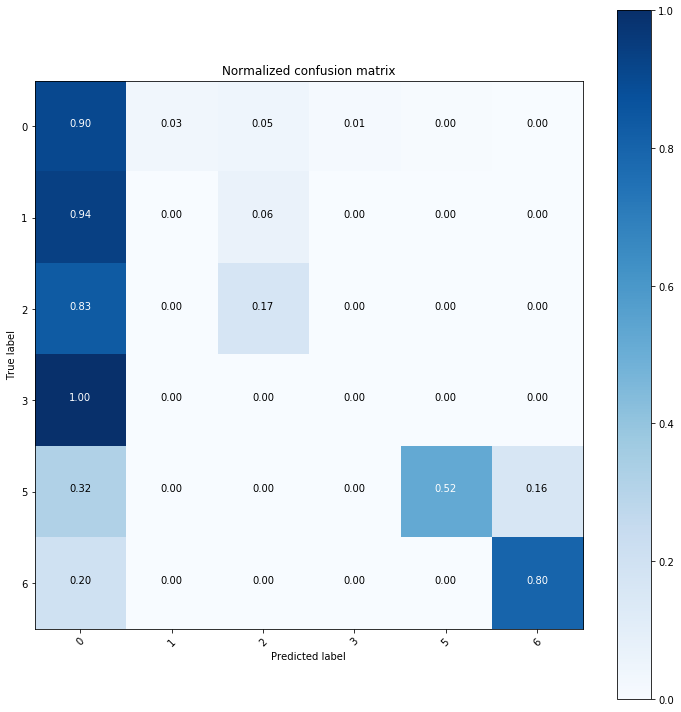

predicting 2 performance


100%|██████████| 361/361 [00:51<00:00,  6.95it/s]


============  left arm ============
Normalized confusion matrix
[[ 0.49166667  0.2125      0.          0.2875      0.00833333  0.        ]
 [ 0.46753247  0.20779221  0.01298701  0.31168831  0.          0.        ]
 [ 0.66666667  0.16666667  0.          0.16666667  0.          0.        ]
 [ 0.25        0.          0.          0.75        0.          0.        ]
 [ 0.2         0.          0.          0.          0.8         0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]]


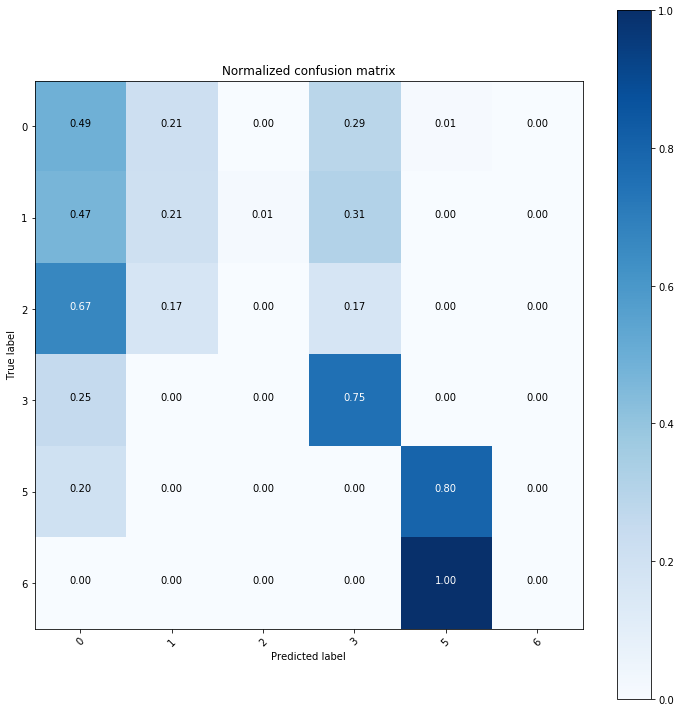

============ right arm ============
Normalized confusion matrix
[[ 0.86666667  0.04583333  0.0625      0.025       0.          0.        ]
 [ 0.85714286  0.03896104  0.09090909  0.01298701  0.          0.        ]
 [ 1.          0.          0.          0.          0.          0.        ]
 [ 0.875       0.          0.          0.125       0.          0.        ]
 [ 0.28        0.          0.          0.          0.72        0.        ]
 [ 0.6         0.          0.          0.          0.          0.4       ]]


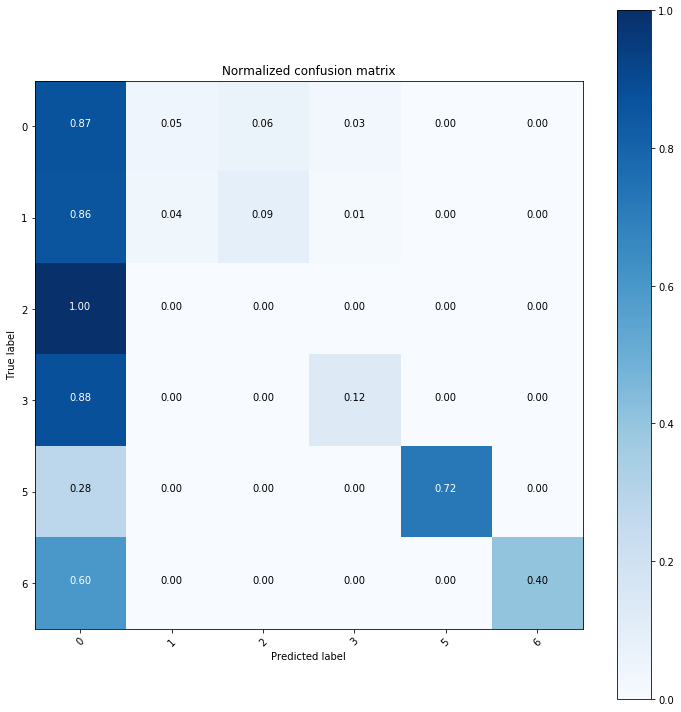

predicting 3 performance


100%|██████████| 361/361 [00:51<00:00,  6.95it/s]


============  left arm ============
Normalized confusion matrix
[[ 0.99166667  0.00833333  0.          0.          0.          0.        ]
 [ 0.22077922  0.77922078  0.          0.          0.          0.        ]
 [ 0.16666667  0.          0.83333333  0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]


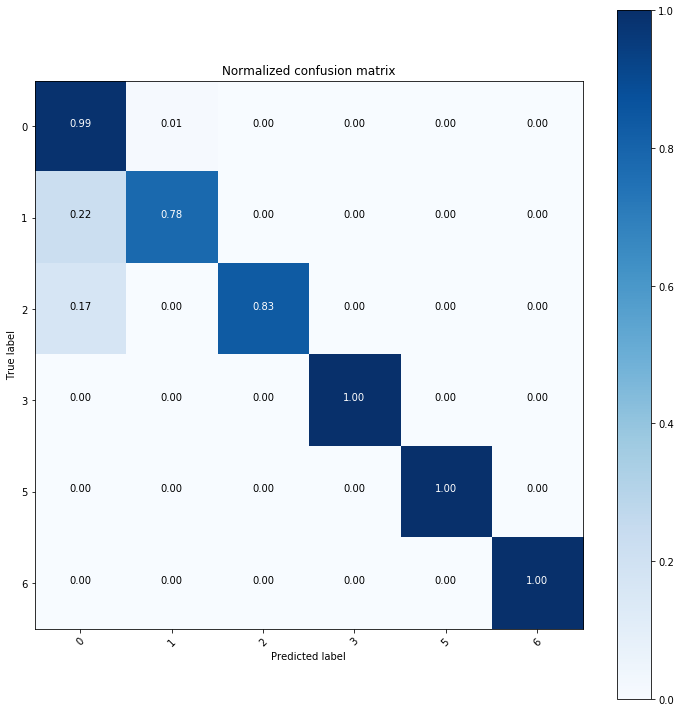

============ right arm ============
Normalized confusion matrix
[[ 1.          0.          0.          0.          0.          0.        ]
 [ 0.31168831  0.68831169  0.          0.          0.          0.        ]
 [ 0.33333333  0.          0.66666667  0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]


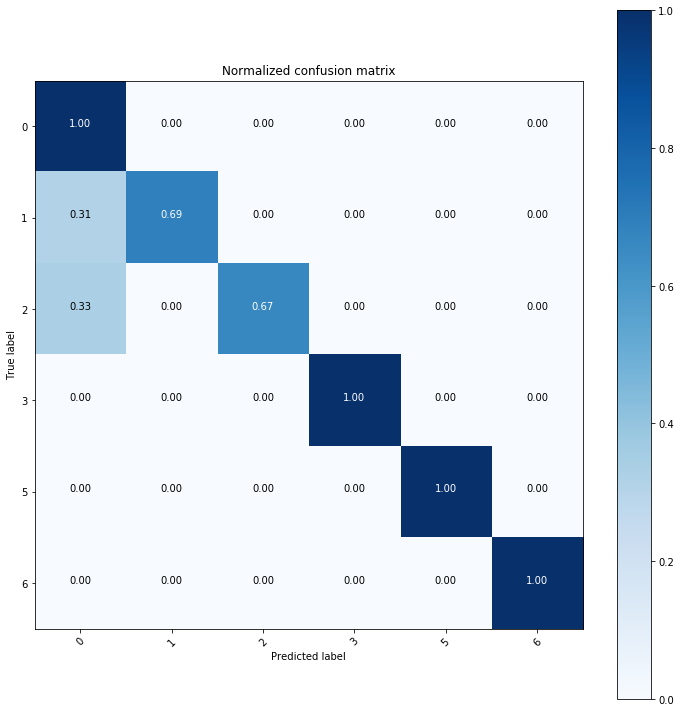

In [10]:
for od in range(len(pfs)):
    print('predicting %d performance' % (od + 1))
    left_y, right_y, y = model.predict(pfs[od])
    
    print('============  left arm ============')
    cutstom_output_cnf_matrix(y, left_y)
    
    print('============ right arm ============')
    cutstom_output_cnf_matrix(y, right_y)